In [194]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from heapq import heappush, heappop
#import seaborn as sns
%matplotlib inline

### SF drug geography

#### Data pulling and cleaning - 

In [7]:
d_tax = pd.read_csv('trip_data_6_9_15.csv')
print d_tax.shape
d_tax.head(1)

(3385800, 14)


medallion                      hack_license  \
0  07A0F87F3E065B7013796526962B61FA  D07EB33A97693D232CEF070432EAA9B3   

  vendor_id  rate_code store_and_fwd_flag      pickup_datetime  \
0       VTS          1                NaN  2013-06-11 15:41:00   

      dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  \
0  2013-06-11 16:08:00                1               1620           1.36   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  
0         -73.96434        40.776321         -73.973068          40.76424

In [129]:
from datetime import datetime, date, time
str_date = d_tax['pickup_datetime'][0]
lastconnection =  datetime.strptime("2015-12-08 6:41:00","%Y-%m-%d %H:%M:%S")
lastconnection.hour

6

In [212]:
company = {}
weeks = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
days_weeks = {'Monday' : [0,0], 'Tuesday' : [0,0], 'Wednesday' : [0,0], 'Thursday' : [0,0], 'Friday' : [0,0], 'Saturday' : [0,0], 'Sunday' : [0,0]}
#d_tax.shape[0]
saturday_or_sunday = 0
work_day = 0
for i in range(d_tax.shape[0]):
    cur = company.setdefault(d_tax['vendor_id'][i],[0,0])
    if (cur is None):
        company.update({d_tax['vendor_id'][i] : [0,0]})
        
    #а тут мы парсим и находим день недели и время
    day = datetime.strptime(d_tax['pickup_datetime'][i],"%Y-%m-%d %H:%M:%S")
    
    #Давайте скажем, что ночь это с 11 до 6 утра. (Википедия)
    cur_day = days_weeks.setdefault(weeks[day.weekday()],[0,0])
    if (6 <= day.hour <= 11):
        days_weeks.update({weeks[day.weekday()] : [cur_day[0],cur_day[1] + 1]})
        company.update({d_tax['vendor_id'][i] : [cur[0],cur[1] + 1]})
    else:
        days_weeks.update({weeks[day.weekday()] : [cur_day[0] + 1,cur_day[1]]})
        company.update({d_tax['vendor_id'][i] : [cur[0] + 1,cur[1]]})
        
print company
print days_weeks

{'VTS': [1284278, 413103], 'CMT': [1269160, 419259]}
{'Monday': [327709, 133458], 'Tuesday': [340905, 132703], 'Friday': [373815, 134123], 'Wednesday': [352299, 134340], 'Thursday': [376267, 143528], 'Sunday': [370433, 70620], 'Saturday': [412010, 83590]}


In [405]:
print all_week

[461167, 473608, 507938, 486639, 519795, 441053, 495600]


Давайте посмотрим как кол-во поездок зависит от времени суток и от дня неделии. Для этого посмотроим 4 графика.
Из них можно увидеть, что ночью примерное одинаковое кол-во человек, исключение состовляет только пятница.
Что в принципе и логично. Вообще в пятницу совершается больше всего поездок. Но вот днем в воскресенье - самое
большое количество в дневное время. 

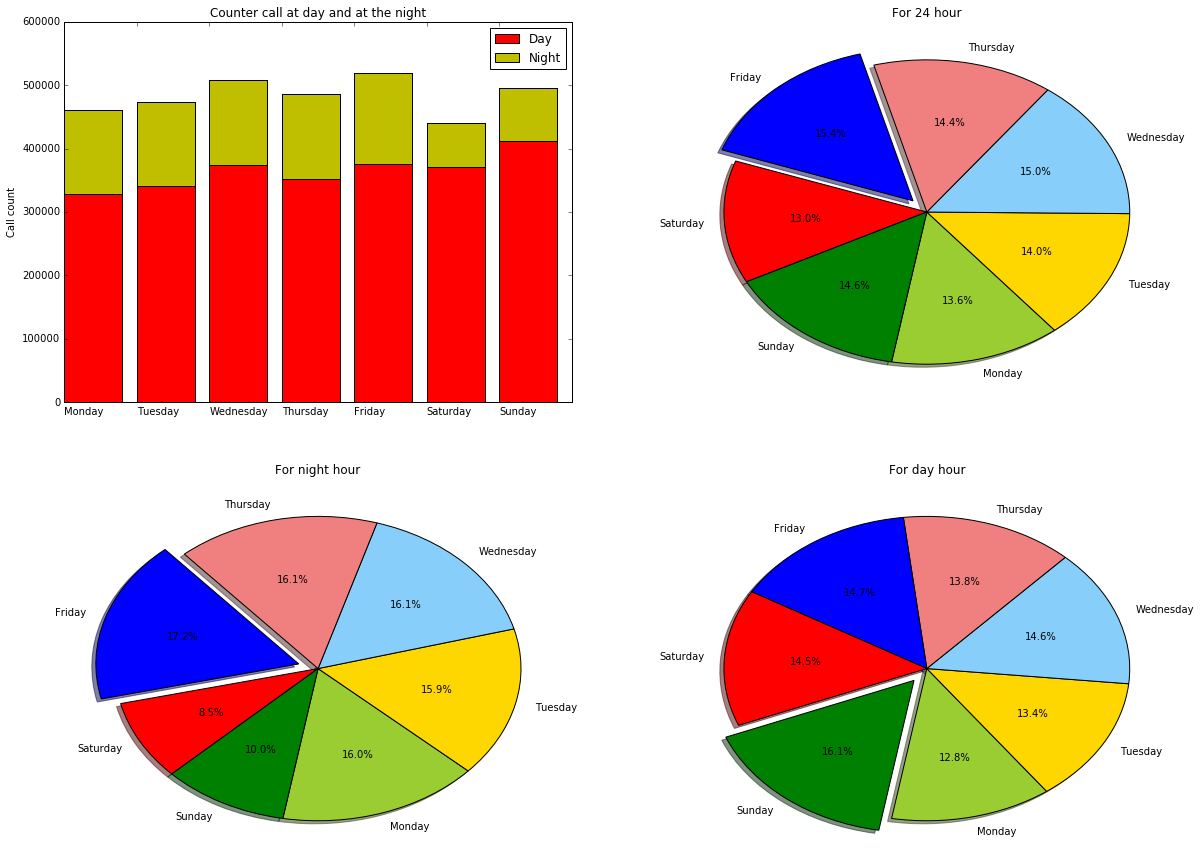

In [406]:
plt.figure(figsize=(20,15))
a = plt.subplot(2, 2, 1)
days_week = []
night_week = []
all_week = []
for i in days_weeks.values():
    days_week.append(i[0])
    night_week.append(i[1])
    all_week.append(i[0] + i[1])
    
p1 = plt.bar(range(0,len(weeks)), days_week, color='r')
p2 = plt.bar(range(0,len(weeks)), night_week, color='y',bottom=days_week)
a.bar(range(0,len(weeks)), night_week, color='y',bottom=days_week)
plt.title("Counter call at day and at the night")
plt.ylabel("Call count")
a.set_xticklabels(weeks,ha = 'left')
plt.legend((p1[0], p2[0]), ('Day', 'Night'))

plt.subplot(2, 2, 2)
explode=(0, 0, 0, 0, 0.1, 0, 0)
plt.title("For 24 hour")
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','blue', 'red', 'green']
plt.pie(all_week, explode=explode, labels=weeks,colors = colors, autopct='%1.1f%%', shadow=True, startangle=260)

plt.subplot(2, 2, 3)
explode=(0, 0, 0, 0, 0.1, 0, 0)
plt.title("For night hour")
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','blue', 'red', 'green']
plt.pie(night_week, explode=explode, labels=weeks,colors = colors, autopct='%1.1f%%', shadow=True, startangle=260)

plt.subplot(2, 2, 4)
explode=(0, 0, 0, 0, 0, 0, 0.1)
plt.title("For day hour")
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','blue', 'red', 'green']
plt.pie(days_week, explode=explode, labels=weeks,colors = colors, autopct='%1.1f%%', shadow=True, startangle=260)


plt.show()

А теперь давайте посмотрим какие компании занимаются перевозкой. Мы узнали, что только две большие компание развозят
людей. И в целом посчитав их заказы ничего примечательного не нашли.
В целом они обслуживают по половине.

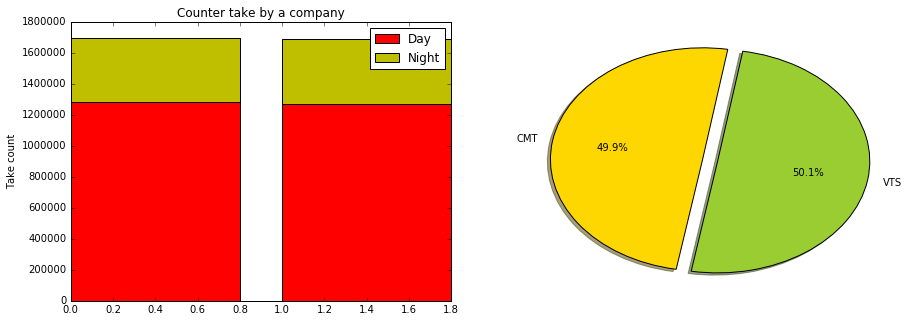

In [291]:
days_company = []
night_company = []
all_company = []
for i in company.values():
    days_company.append(i[0])
    night_company.append(i[1])
    all_company.append(i[0] + i[1])
    
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
p1 = plt.bar(range(0,len(company.keys())), days_company, color='r')
p2 = plt.bar(range(0,len(company.keys())), night_company, color='y',bottom=days_company)
a.bar(range(0,len(company.keys())), night_company, color='y',bottom=days_company)
plt.title("Counter take by a company")
plt.ylabel("Take count")
a.set_xticklabels(company.keys(),ha = 'left')
plt.legend((p1[0], p2[0]), ('Day', 'Night'))

plt.subplot(1, 2, 2)
explode = (0, 0.1)
plt.pie(all_company, explode=explode, labels=company.keys(),colors = colors, autopct='%1.1f%%', shadow=True, startangle=260)


plt.show()

Давайте посмотрим на загруженность мест

In [322]:
what_to_pos = []
for i in range(d_tax.shape[0]):
    pos = [d_tax['pickup_latitude'][i],d_tax['pickup_longitude'][i]]
    if (pos[0] != 0):
        what_to_pos.append([(d_tax['pickup_latitude'][i] ** 2 + d_tax['pickup_longitude'][i] ** 2) ** 0.5, pos])

In [325]:
what_to_pos.sort()

In [395]:
#what_to_pos.append([0,0,0])
what_to_pos_last = []
eps = 0.00001
i = 0
cur_i = -1
while (i < len(what_to_pos)):
    #while (what_to_pos[i][0]): #bad points couse not real
    #    i = i + 1
    cur_length = what_to_pos[i][0]
    cur_i = cur_i + 1
    what_to_pos_last.append([what_to_pos[i][1],1])
    i = i + 1
    while (i < len(what_to_pos) and (what_to_pos[i][0] - cur_length < eps)):
        what_to_pos_last[cur_i][1] =  what_to_pos_last[cur_i][1] + 1
        i = i + 1

        

А тепер самое интересное - распределение по точкам вызова. На карте отмечены точки и в зависимости от размера
точки и глубины её цвета, тем больше пассажирова заказывало такси из той области. 
Ткнув на точку можно узнать точное число.

In [404]:
import folium
import random
import struct
import math
from matplotlib import cm

colors = ['#3196cc','#3186cc','#3176cc','#3166cc','#3156cc','#3146cc','#3136cc','#3126cc','#3116cc','#3106cc']
NEW_YORK_COORDINATES = (40.7127, -74.0059)
#tiles='Stamen Toner'
map = folium.Map(location=NEW_YORK_COORDINATES, tiles='Stamen Toner', zoom_start = 14)
#d_tax.shape[0]
max_people = 0;
for i in what_to_pos_last:
    max_people = max(max_people,i[1])
step = max_people / 9;
for i in what_to_pos_last:
    pos = i[0]
    if (i[1] >= 5):
        cur_step = step
        j = 0;
        while (i[1] > cur_step):
            cur_step = cur_step + step
            j = j + 1
        map.circle_marker(location=pos, popup=str(i[1]),line_color=colors[j],
                          fill_color='#3186cc', fill_opacity=0.5, radius=i[1] / 50)
        
map